In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from datasets import load_dataset
from transformers import XLMRobertaForSequenceClassification, XLMRobertaTokenizer

warnings.filterwarnings("ignore")

In [2]:
dataset = load_dataset("masakhane/masakhanews", "swa")
labels = dataset["train"].features["label"].names

In [3]:
plt.rcParams.update(
    {
        "font.size": 12,
        "font.family": "serif",
        "font.serif": ["Times New Roman"],
    }
)

In [4]:
# Health
# text = "Hospitali za Uingereza zinajiandaa kuanza kutoa dozi za kwanza za chanjo ya virusi vya corona sasa kwasababu wadhibiti wa viwango wameidhidnisha matumizi ya chanjo ya Pfizer/BioNTech kutumika."

# Sport
# text = "Chelsea wapo mbele ya Manchester United na Paris St-Germain katika mbio za kutaka kumsajili beki wa Real Madrid na timu ya taifa ya Ufaransa Raphael Varane, 28."

# Sport
text = "(TV2, via Goal) Real Madrid inatarajiwa kuwapunguzia tena marupurupu wachezaji wake kutokana na athari za janga la virus vya corona."

# Politics
# text = "Rais Donald Trump amemfuta kazi Waziri wa Ulinzi Mark Esper, na kutangaza kwenye Twitter kwamba afisa huyo wa ngazi ya juu wa Marekani amefutwa."

In [5]:
model_name = "2024-10-21_11-11-33_classification_finetuned_true"
model = XLMRobertaForSequenceClassification.from_pretrained(f"../results/{model_name}")
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

In [6]:
layer = 10
head = 3

Predicted: sports


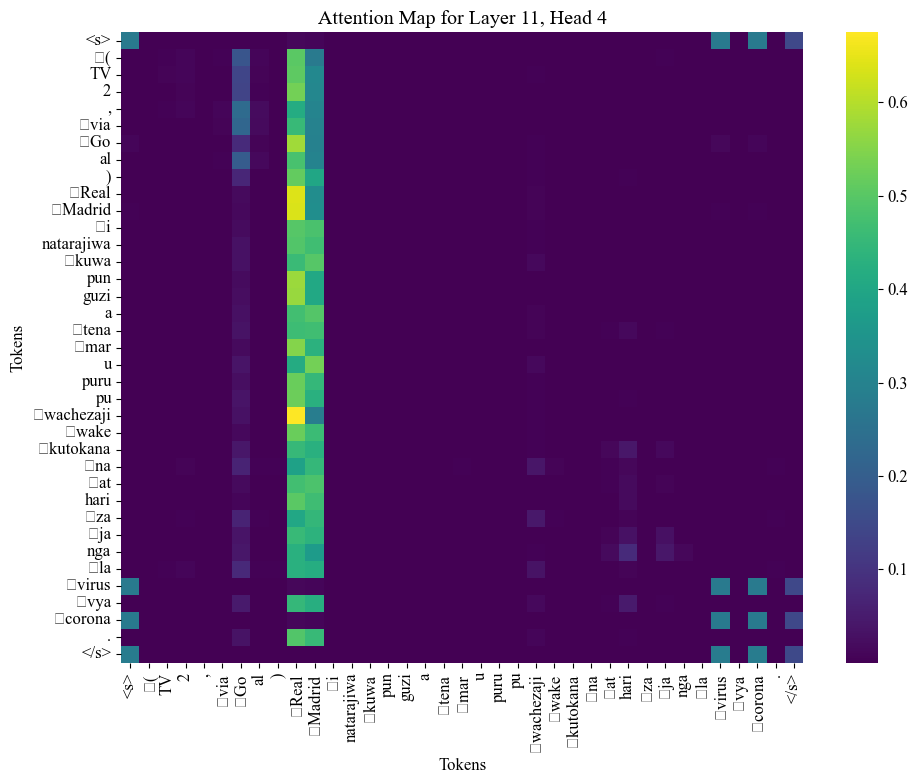

In [7]:
model.eval()

inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)
    attentions = outputs.attentions
    logits = outputs.logits

predicted_class_idx = torch.argmax(logits, dim=1).item()
print(f"Predicted: {labels[predicted_class_idx]}")

attention_map = attentions[layer][0, head].detach().cpu().numpy()


def plot_attention(attention_map, tokens):
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_map, xticklabels=tokens, yticklabels=tokens, cmap="viridis")
    plt.xlabel("Tokens")
    plt.ylabel("Tokens")
    plt.title(f"Attention Map for Layer {layer + 1}, Head {head + 1}")
    plt.tight_layout()
    plt.savefig(
        f"../results/attention_map_layer_{layer + 1}_head_{head + 1}_sport_virus.png"
    )
    plt.show()


tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
plot_attention(attention_map, tokens)